# Understanding Overfitting, Underfitting, and the Bias-Variance Trade-off

## What is Overfitting?
**Definition:**  
Overfitting occurs when a model learns not only the underlying patterns in the data but also the noise or random variations. This results in excellent performance on the training data but poor generalization to unseen data.

**Characteristics:**  
- High accuracy on the training dataset.  
- Low accuracy on the validation or test dataset.  

**Example:**  
A decision tree with a very high depth may memorize the training data perfectly but fail to generalize.

---

## What is Underfitting?
**Definition:**  
Underfitting happens when a model is too simplistic to capture the underlying structure of the data. This leads to poor performance on both training and test datasets.

**Characteristics:**  
- Low accuracy on the training dataset.  
- Low accuracy on the validation or test dataset.  

**Example:**  
A decision tree with a depth of 1 might oversimplify the problem and miss critical patterns.

---

## Bias-Variance Trade-off
The bias-variance trade-off is a core concept for managing model complexity:

- **Bias:** Error due to overly simplistic assumptions in the model. High bias causes underfitting.  
- **Variance:** Error due to the model being too sensitive to small fluctuations in the training data. High variance causes overfitting.  

**The goal:** Find a balance between bias and variance for optimal performance.

---

## Practical Implementation

### 1. Observing Underfitting and Overfitting with Model Depth
- Train a decision tree with increasing depths.  
- Observe the model's performance on both training and validation datasets.  
- Plot the errors:
  - **Training error:** Decreases as model complexity increases.  
  - **Validation error:** Initially decreases but increases after a certain point, indicating overfitting.

### 2. Regularization to Combat Overfitting
- Regularization techniques like **L1** or **L2 penalties** can be applied to constrain the model's complexity.  
- These techniques add a penalty to the model's loss function, discouraging overly complex models.


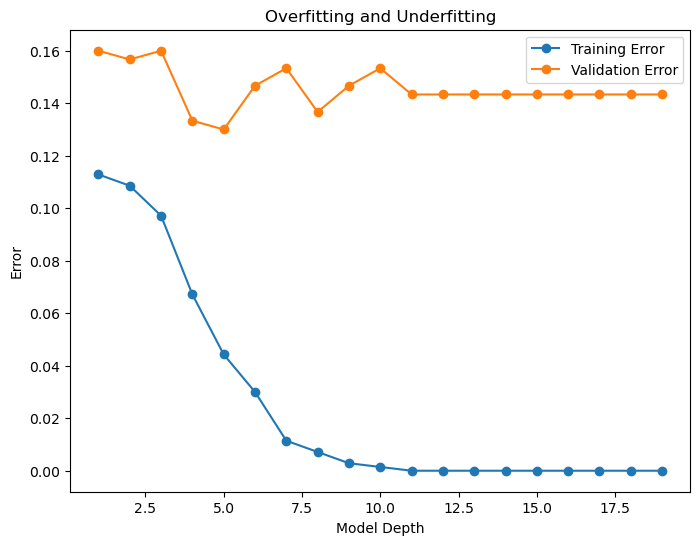

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_errors = []
test_errors = []
depths = range(1, 20)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, model.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(8, 6))
plt.plot(depths, train_errors, label='Training Error', marker='o')
plt.plot(depths, test_errors, label='Validation Error', marker='o')
plt.xlabel('Model Depth')
plt.ylabel('Error')
plt.title('Overfitting and Underfitting')
plt.legend()
plt.show()

## Key Observations
- **Underfitting:** At low depths, both training and validation errors are high.
- **Overfitting:** At high depths, training error is low, but validation error increases.
- **Ideal Depth:** The point where validation error is minimized represents the best trade-off.

In [ ]:
## Key Takeaways
- Overfitting can be mitigated by techniques such as:
Regularization (e.g., Ridge, Lasso).
Reducing model complexity (e.g., pruning in decision trees).
Using more training data.
Underfitting can be addressed by:
Increasing model complexity.
Using more relevant features.